<a href="https://colab.research.google.com/github/Shreyabansal3112/image-basics/blob/main/exp_5_and_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2 as cv 
import matplotlib.pyplot as plt

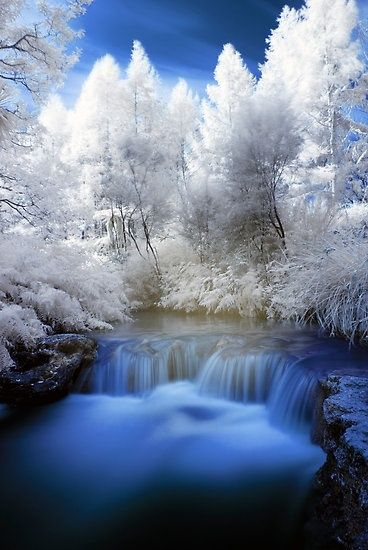

(550, 368, 3)

In [ ]:
ima = cv.imread('p2.jpg')
from google.colab.patches import cv2_imshow
cv2_imshow(ima)
ima.shape

In [ ]:
kernel = np.ones((5,5),np.float32)/25
dst = cv.filter2D(ima,-1,kernel)

In [ ]:
cv2_imshow(dst)

In [ ]:
final_frame = cv.hconcat((ima, dst))
cv2_imshow(final_frame)

In [ ]:
blur = cv.blur(ima,(7,7))
cv2_imshow(blur)

In [ ]:
final_frame = cv.hconcat((dst, blur))
cv2_imshow(final_frame)

In [ ]:
gblur = cv.GaussianBlur(ima,(7,7),0)
cv2_imshow(gblur)

In [ ]:
final_frame = cv.hconcat((blur, gblur))
cv2_imshow(final_frame)

In [ ]:
median = cv.medianBlur(ima,7)
cv2_imshow(median)


In [ ]:
finalr = cv.hconcat([ima,blur,gblur,median])
cv2_imshow(finalr)

In [ ]:
kernel = np.array([[0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]])
dst = cv.filter2D(ima,-1,kernel)

In [ ]:
cv2_imshow(dst)

In [ ]:
final_frame = cv.hconcat((ima, dst))
cv2_imshow(final_frame)

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


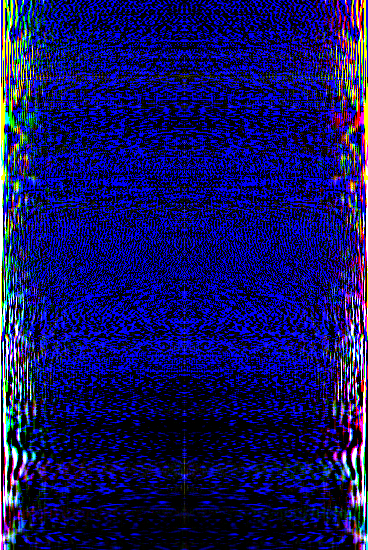

In [ ]:
f = np.fft.fft2(ima)
cv2_imshow(f)

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


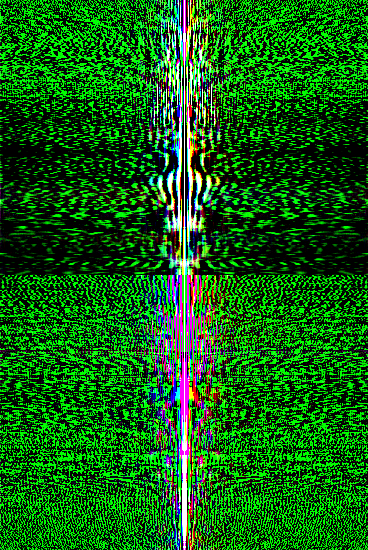

In [ ]:
fshift = np.fft.fftshift(f)
cv2_imshow(fshift)


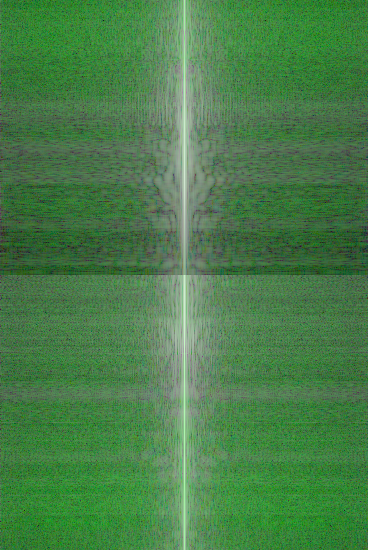

In [ ]:
magnitude_spectrum = 20*np.log(np.abs(fshift))
cv2_imshow(magnitude_spectrum)

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


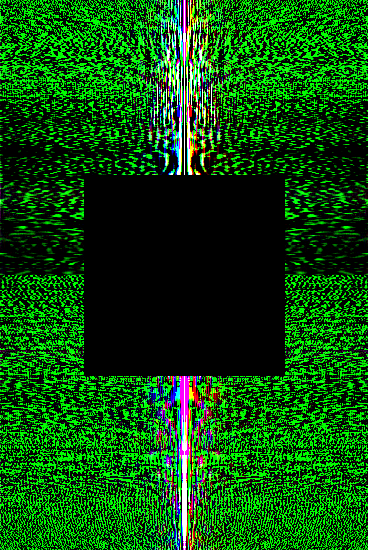

In [ ]:
rows, cols,band= ima.shape
crow,ccol = rows//2 , cols//2
fshift[crow-100:crow+101, ccol-100:ccol+101] = 0
cv2_imshow(fshift)

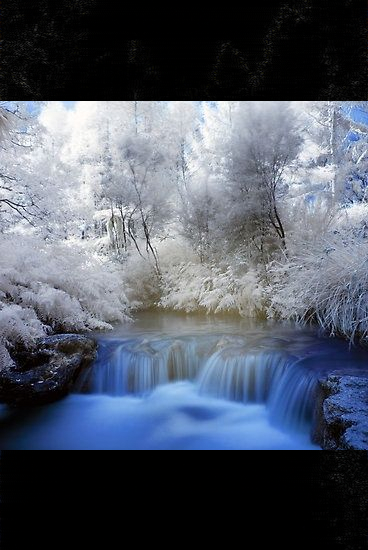

In [ ]:
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
cv2_imshow(img_back)

In [ ]:
img_back.shape

(550, 368, 3)

In [ ]:
final_frame = cv.hconcat((ima,img_back))
cv2_imshow(final_frame)

error: ignored

In [ ]:
ima.shape

(550, 368, 3)

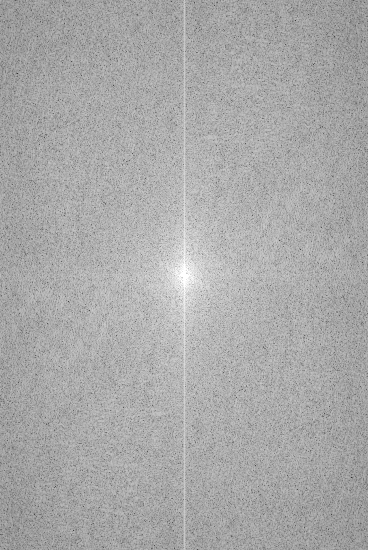

In [ ]:
img = cv.imread('p2.jpg', cv.IMREAD_GRAYSCALE)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
cv2_imshow(magnitude_spectrum)

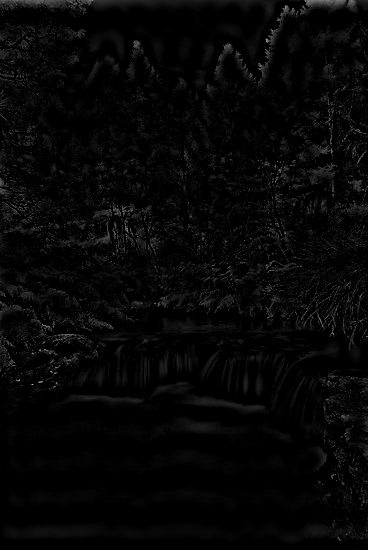

In [ ]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
fshift[crow-5:crow+6, ccol-5:ccol+6] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)
cv2_imshow(img_back)

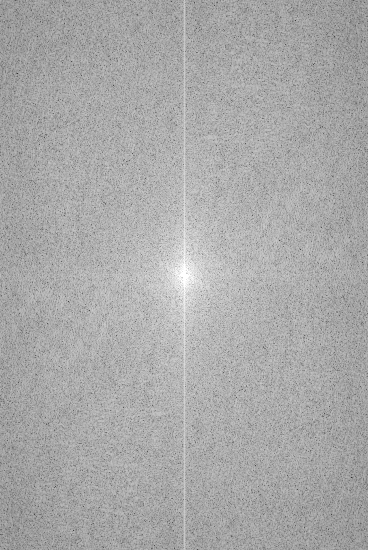

(550, 368)

In [ ]:
dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
cv2_imshow(magnitude_spectrum)
magnitude_spectrum.shape

In [ ]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1
mask.shape



(550, 368, 2)

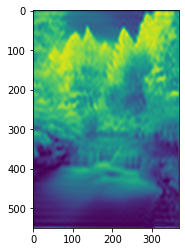

In [ ]:
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.imshow(img_back)


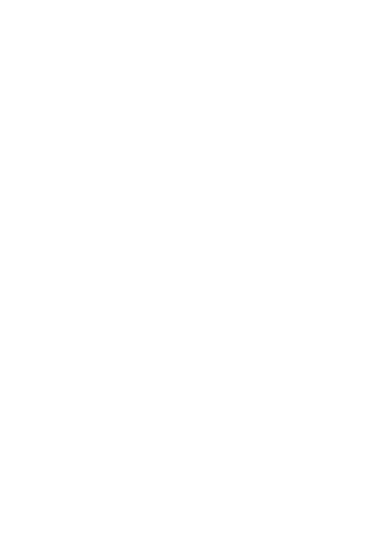

In [ ]:
cv2_imshow(img_back)